This homework is to implement different feature scaling processes and see how gradient descent works after feature scaling

In [2]:
import numpy as np
import matplotlib.pyplot as plt


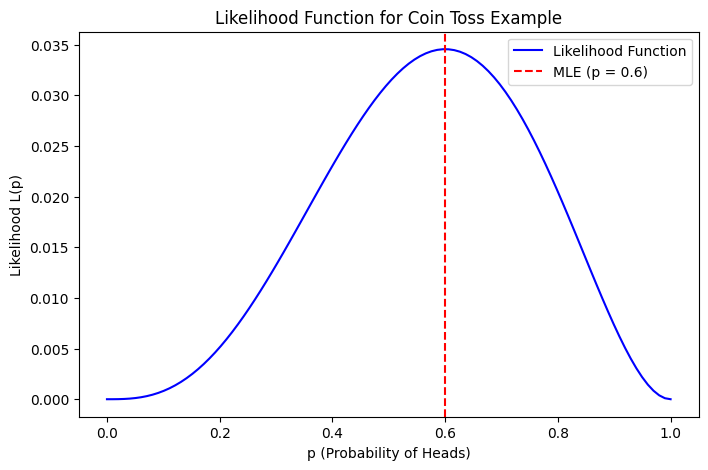

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Observed data: 3 heads, 2 tails
heads = 3
tails = 2

# Possible values of p
p_values = np.linspace(0, 1, 100)  # 100 values from 0 to 1
likelihoods = (p_values**heads) * ((1 - p_values)**tails)  # Compute likelihood

# Plot the likelihood function
plt.figure(figsize=(8, 5))
plt.plot(p_values, likelihoods, label="Likelihood Function", color='b')
plt.axvline(x=0.6, linestyle="--", color="r", label="MLE (p = 0.6)")
plt.xlabel("p (Probability of Heads)")
plt.ylabel("Likelihood L(p)")
plt.title("Likelihood Function for Coin Toss Example")
plt.legend()
plt.show()


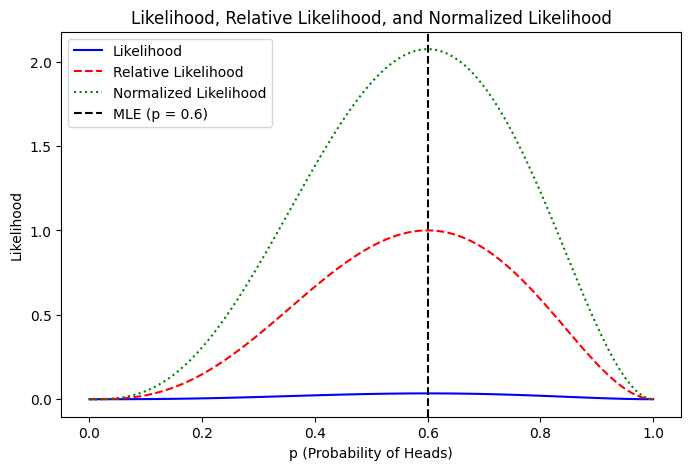

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps  # For numerical integration

# Observed data: 3 heads, 2 tails
heads = 3
tails = 2

# Define likelihood function
def likelihood(p):
    return (p**heads) * ((1 - p)**tails)

# Generate p values
p_values = np.linspace(0, 1, 100)
likelihood_values = likelihood(p_values)

# Compute relative likelihood
max_likelihood = max(likelihood_values)
relative_likelihood = likelihood_values / max_likelihood  # Scale to max 1

# Compute normalized likelihood
area_under_curve = simps(likelihood_values, p_values)  # Numerical integration
normalized_likelihood = likelihood_values / area_under_curve  # Force sum to 1

# Plot likelihoods
plt.figure(figsize=(8, 5))
plt.plot(p_values, likelihood_values, label="Likelihood", color="blue")
plt.plot(p_values, relative_likelihood, label="Relative Likelihood", linestyle="dashed", color="red")
plt.plot(p_values, normalized_likelihood, label="Normalized Likelihood", linestyle="dotted", color="green")
plt.axvline(x=0.6, linestyle="--", color="black", label="MLE (p = 0.6)")
plt.xlabel("p (Probability of Heads)")
plt.ylabel("Likelihood")
plt.title("Likelihood, Relative Likelihood, and Normalized Likelihood")
plt.legend()
plt.show()


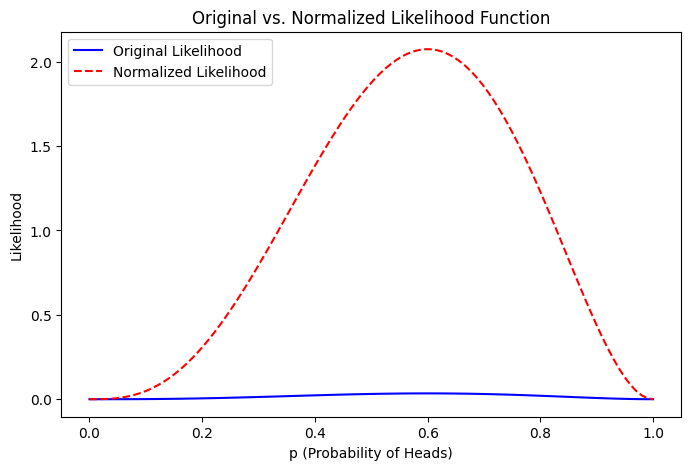

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Observed data: 3 heads, 2 tails
heads = 3
tails = 2

# Define likelihood function
def likelihood(p):
    return (p**heads) * ((1 - p)**tails)

# Generate p values
p_values = np.linspace(0, 1, 100)
likelihood_values = likelihood(p_values)

# Compute total area (numerical integration)
area_under_curve = simps(likelihood_values, p_values)  

# Compute normalized likelihood
normalized_likelihood = likelihood_values / area_under_curve  

# Plot
plt.figure(figsize=(8, 5))
plt.plot(p_values, likelihood_values, label="Original Likelihood", color="blue")
plt.plot(p_values, normalized_likelihood, label="Normalized Likelihood", linestyle="dashed", color="red")
plt.xlabel("p (Probability of Heads)")
plt.ylabel("Likelihood")
plt.title("Original vs. Normalized Likelihood Function")
plt.legend()
plt.show()


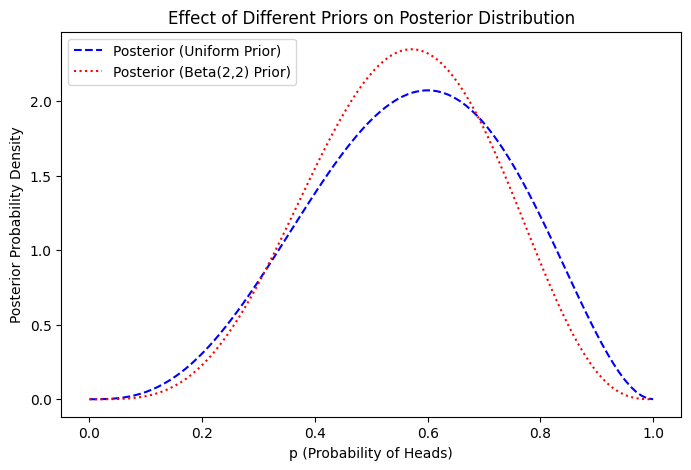

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy.stats import beta

# Observed data: 3 heads, 2 tails
heads = 3
tails = 2

# Define likelihood function
def likelihood(p):
    return (p**heads) * ((1 - p)**tails)

# Define Beta prior (e.g., Beta(2,2))
def beta_prior(p, alpha=2, beta=2):
    return p**(alpha-1) * (1 - p)**(beta-1)

# Generate p values
p_values = np.linspace(0, 1, 100)
likelihood_values = likelihood(p_values)

# Normalize likelihood (uniform prior)
area_under_likelihood = simps(likelihood_values, p_values)
posterior_uniform = likelihood_values / area_under_likelihood  # Normalized likelihood

# Compute posterior with Beta prior
prior_values = beta_prior(p_values)
unnormalized_posterior = likelihood_values * prior_values
area_under_posterior = simps(unnormalized_posterior, p_values)
posterior_beta = unnormalized_posterior / area_under_posterior  # Normalize

# Plot
plt.figure(figsize=(8, 5))
plt.plot(p_values, posterior_uniform, label="Posterior (Uniform Prior)", linestyle="dashed", color="blue")
plt.plot(p_values, posterior_beta, label="Posterior (Beta(2,2) Prior)", linestyle="dotted", color="red")
plt.xlabel("p (Probability of Heads)")
plt.ylabel("Posterior Probability Density")
plt.title("Effect of Different Priors on Posterior Distribution")
plt.legend()
plt.show()


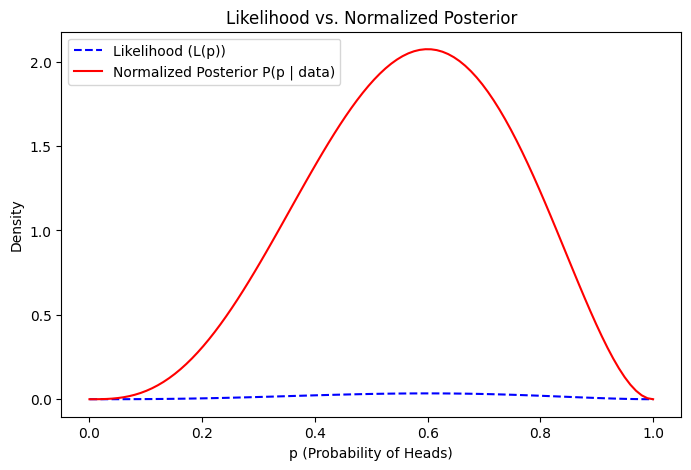

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Observed data: 3 heads, 2 tails
heads = 3
tails = 2

# Define likelihood function
def likelihood(p):
    return (p**heads) * ((1 - p)**tails)

# Generate p values
p_values = np.linspace(0, 1, 100)
likelihood_values = likelihood(p_values)

# Compute total area for normalization
area_under_likelihood = simps(likelihood_values, p_values)

# Compute normalized likelihood
posterior = likelihood_values / area_under_likelihood  

# Plot
plt.figure(figsize=(8, 5))
plt.plot(p_values, likelihood_values, label="Likelihood (L(p))", linestyle="dashed", color="blue")
plt.plot(p_values, posterior, label="Normalized Posterior P(p | data)", color="red")
plt.xlabel("p (Probability of Heads)")
plt.ylabel("Density")
plt.title("Likelihood vs. Normalized Posterior")
plt.legend()
plt.show()


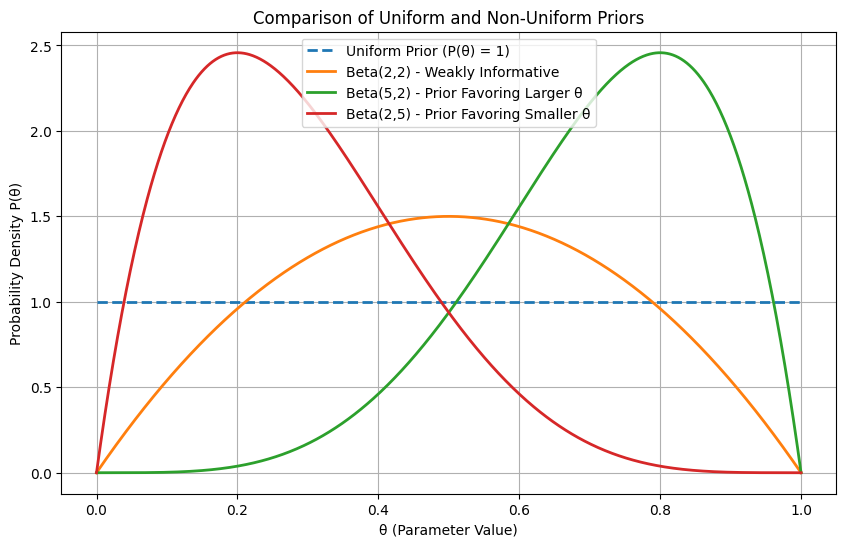

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define theta values from 0 to 1
theta = np.linspace(0, 1, 1000)

# Uniform prior (P(θ) = 1 for 0 ≤ θ ≤ 1)
uniform_prior = np.ones_like(theta)

# Non-uniform priors (Beta distributions)
beta_prior_1 = beta.pdf(theta, 2, 2)  # Weakly informative prior
beta_prior_2 = beta.pdf(theta, 5, 2)  # Prior favoring larger θ values
beta_prior_3 = beta.pdf(theta, 2, 5)  # Prior favoring smaller θ values

# Plot the priors
plt.figure(figsize=(10, 6))

# Plot uniform prior
plt.plot(theta, uniform_prior, label='Uniform Prior (P(θ) = 1)', linestyle='dashed', linewidth=2)

# Plot non-uniform priors
plt.plot(theta, beta_prior_1, label='Beta(2,2) - Weakly Informative', linewidth=2)
plt.plot(theta, beta_prior_2, label='Beta(5,2) - Prior Favoring Larger θ', linewidth=2)
plt.plot(theta, beta_prior_3, label='Beta(2,5) - Prior Favoring Smaller θ', linewidth=2)

# Labels and legend
plt.xlabel('θ (Parameter Value)')
plt.ylabel('Probability Density P(θ)')
plt.title('Comparison of Uniform and Non-Uniform Priors')
plt.legend()
plt.grid()

# Show the plot
plt.show()


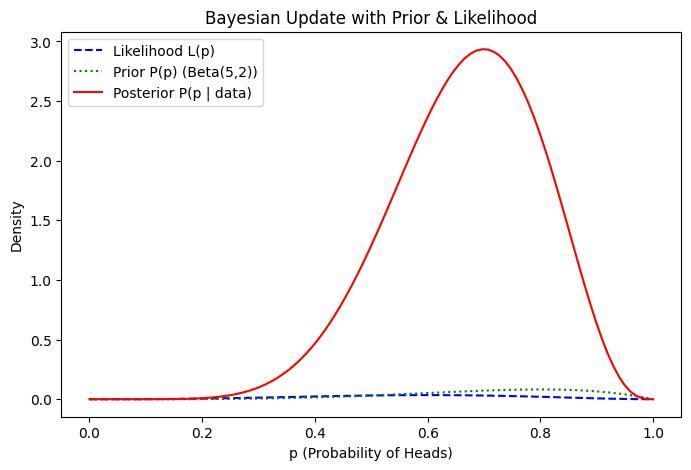

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Observed data: 3 heads, 2 tails
heads = 3
tails = 2

# Define likelihood function
def likelihood(p):
    return (p**heads) * ((1 - p)**tails)

# Define prior (Beta(5,2) - favors high p values)
alpha, beta_param = 5, 2
def beta_prior(p):
    return p**(alpha-1) * (1 - p)**(beta_param-1)

# Generate p values
p_values = np.linspace(0, 1, 100)
likelihood_values = likelihood(p_values)
prior_values = beta_prior(p_values)

# Compute unnormalized posterior
unnormalized_posterior = likelihood_values * prior_values

# Compute normalization constant (P(data))
area_under_posterior = simps(unnormalized_posterior, p_values)

# Compute normalized posterior
posterior = unnormalized_posterior / area_under_posterior  

# Plot
plt.figure(figsize=(8, 5))
plt.plot(p_values, likelihood_values, label="Likelihood L(p)", linestyle="dashed", color="blue")
plt.plot(p_values, prior_values, label="Prior P(p) (Beta(5,2))", linestyle="dotted", color="green")
plt.plot(p_values, posterior, label="Posterior P(p | data)", color="red")
plt.xlabel("p (Probability of Heads)")
plt.ylabel("Density")
plt.title("Bayesian Update with Prior & Likelihood")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy.stats import multinomial

# Number of trials (rolling the die 4 times)
n = 4

# Number of possible outcomes (6 faces on a die)
m = 6

# Probabilities for a fair die (each face has equal probability)
p = [1/m] * m

# Generate all possible count combinations where sum(X_i) = n
all_outcomes = []
probabilities = []

# Iterate over all valid (X1, X2, ..., X6) where sum = n
for counts in itertools.combinations_with_replacement(range(n+1), m-1):
    # Convert to full count vector
    x = np.diff((0,) + counts + (n,))
    
    if np.sum(x) == n:  # Only keep valid cases where total rolls sum to n
        all_outcomes.append(x)
        probabilities.append(multinomial.pmf(x, n, p))

# Convert to numpy arrays
all_outcomes = np.array(all_outcomes)
probabilities = np.array(probabilities)

# Sort by probability for better visualization
sorted_indices = np.argsort(-probabilities)  # Sort in descending order
all_outcomes = all_outcomes[sorted_indices]
probabilities = probabilities[sorted_indices]

# Plot the probabilities
plt.figure(figsize=(10, 6))
plt.bar(range(len(probabilities)), probabilities, tick_label=[str(tuple(out)) for out in all_outcomes], color='skyblue')
plt.xlabel("Outcome (X1, X2, X3, X4, X5, X6)")
plt.ylabel("Probability")
plt.xticks(rotation=90)
plt.title("Multinomial Distribution: Rolling a 6-sided Die 4 Times")
plt.show()
